<a href="https://colab.research.google.com/github/elsiecolme/EscapeEarth/blob/main/Interns/Elise/Activity_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Mounting Our Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Importing Our Libraries
import pandas as pd
!pip install lightkurve
import lightkurve as lk

In [4]:
# Importing Our Libraries
import glob
import os

In [5]:
# Functions To Open Data 
def locate_files(tic,path=None):
    '''
    ~ Locates TESS lightcurve files with filenames formatted from a mast bulk download.~
    REQUIRES: glob
    Args: 
        tic            -(int or str)TESS TIC ID
        path           -(str) path on computer to file(s) location
    Returns:
        list of path strings for all files found with specified tic
    '''
    if path == None: #if only need filename
        fullpath = glob.glob('*{}-*-s_lc.fits'.format(tic)) #to use wildcard*
    else: #user defined path to datafile on their computer
        pathstart = path   
        pathstart = str(pathstart) #make a string in case user forgets to but think that gives an err anyway
        pathend = pathstart +'*{}-*-s_lc.fits'.format(tic) #stitches path & filename
        fullpath= glob.glob(pathend) #to use wildcard* 
    return fullpath

In [6]:
# Functions To Open 
def open_rawdata(fullpath,sector):
    '''
    ~ Opens raw data light curve file objects downloaded to our shared google drive folder~
    REQUIRES: lightkurve as lk
    Args:
        fullpath   -(str) list of path strings for all files found with specified tic
        sector    -(int) sector number for desired data
    Returns:
        lcfs      -(list) list of lightkurve 'lightcurvefile' class objects
    '''
    lcfs = []
    for file in fullpath:
        if len(file)==0:
            print('no files')
        else:
            try:
                lcfile = lk.open(file)
                mystring = str(type(lcfile))
                if mystring[34:-2] == 'TessLightCurveFile':
                    hdr = lcfile.get_header()
                    mysector = hdr['SECTOR']
                    if sector == mysector:
                        lcfs.append(lcfile)
                    else:
                        pass
                else:
                    pass
            except FileNotFoundError:
                pass
    return lcfs

In [19]:
# Load In Starting Data

# tic ids for subsample
subsample_tics = [7582594, 7582633, 7620704, 7618785, 7584049]
# path to raw data
raw_data_path = '/content/gdrive/MyDrive/EscapeEarthData/Sector_14_rawdata/'

# open data
paths2files = locate_files(subsample_tics[2],raw_data_path) #locate filename given tic id, Used 3rd Value in list (Index: 2) 
subsample_data = open_rawdata(paths2files,sector=14) #open the lightcurvefile
print('Initial function output data type:',type(subsample_data))

Initial function output data type: <class 'list'>


Initial data type: <class 'lightkurve.lightcurvefile.TessLightCurveFile'>
type: <class 'list'>


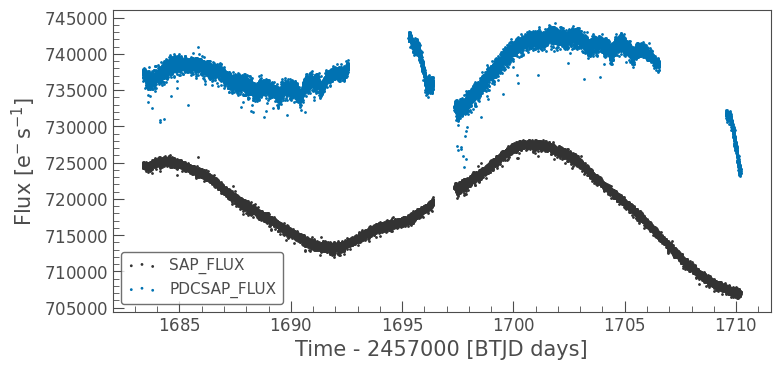

In [37]:
# Test On A Single Target

# examine input data
print('Initial data type:',type(subsample_data[0])) #check inital class object type to see allowed methods
subsample_data[0].scatter() #visualize original data 
print('type:',type(subsample_data))

In [21]:
# change/select data type to necessary class object in order to use class method

pdcsap_data = subsample_data[0].PDCSAP_FLUX #change class object type LightKurveFile --> LightKurve Object
print('original data type:',type(subsample_data[0])) #print to see change in class object type
print('new data type:',type(pdcsap_data)) #verify class object change

original data type: <class 'lightkurve.lightcurvefile.TessLightCurveFile'>
new data type: <class 'lightkurve.lightcurve.TessLightCurve'>


type: <class 'lightkurve.lightcurve.TessLightCurve'>
[737407.56 737201.4  737613.56 ... 723579.3  724070.1  724181.5 ]
14344
18424


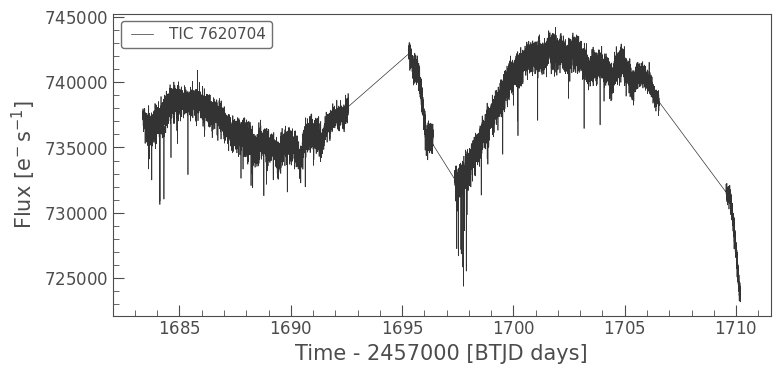

In [34]:
# apply class method: remove_nans()
# a new light curve object from which NaNs fluxes have been removed.

bin_data = pdcsap_data.remove_nans() #apply method 

# remove_nans 
bin_data.plot() #visualize the effect of method
print('type:',type(bin_data)) #check for output data type 

print(bin_data.flux) # prints a list of the array values on the y-axis

print(len(bin_data.flux)) # total length of the array after applying the class method (14333)

print(len(pdcsap_data.flux)) # total length of the array before applying the class method (18424)

# Once we removed the NaN fluxes the array became shorter

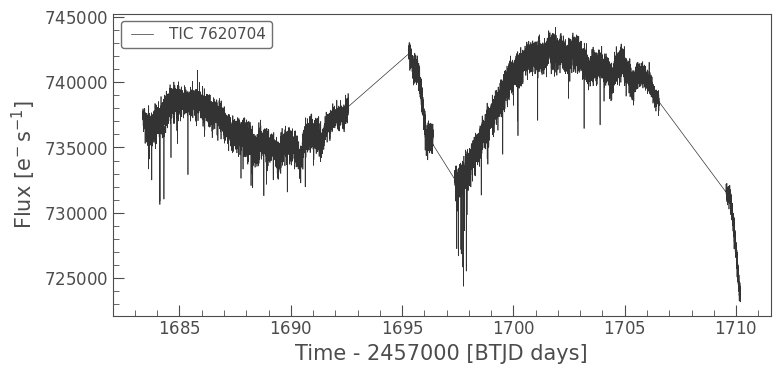

In [35]:
# show how to use any helpful args

bin_data2 = pdcsap_data.remove_nans() #see how args change output data
bin_data2.plot() #visualize effect of arg change

In [24]:
# examine output data

print('Output data type:',type(bin_data2)) #NOTE: your output data type should be 'TessLightCurve' or 'LightCurve'

Output data type: <class 'lightkurve.lightcurve.TessLightCurve'>


class object change: <class 'lightkurve.lightcurvefile.TessLightCurveFile'> changed to <class 'lightkurve.lightcurve.TessLightCurve'>
AxesSubplot(0.125,0.125;0.775x0.755) 15080
class object change: <class 'lightkurve.lightcurvefile.TessLightCurveFile'> changed to <class 'lightkurve.lightcurve.TessLightCurve'>
AxesSubplot(0.125,0.125;0.775x0.755) 14344
class object change: <class 'lightkurve.lightcurvefile.TessLightCurveFile'> changed to <class 'lightkurve.lightcurve.TessLightCurve'>
AxesSubplot(0.125,0.125;0.775x0.755) 18424


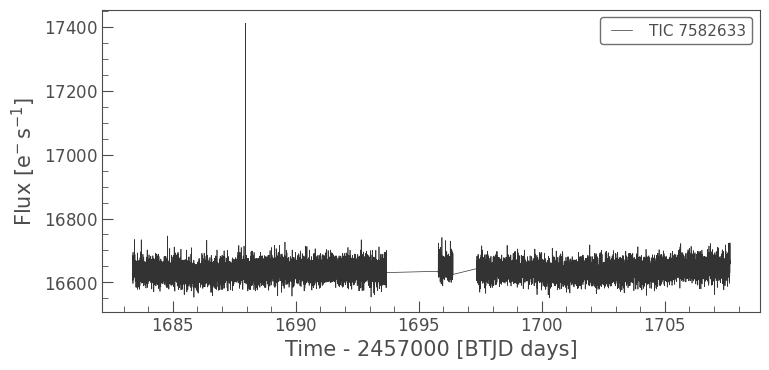

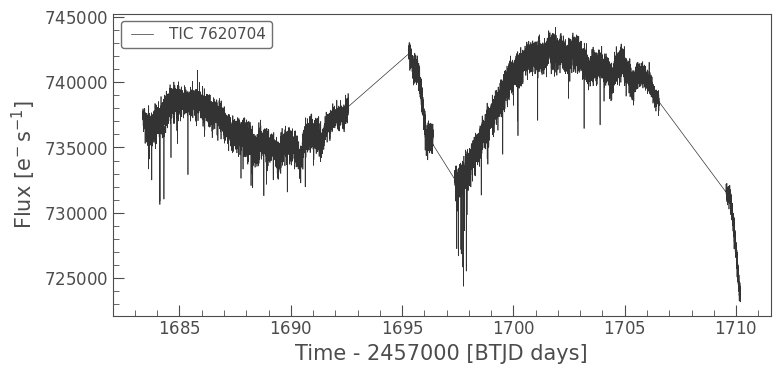

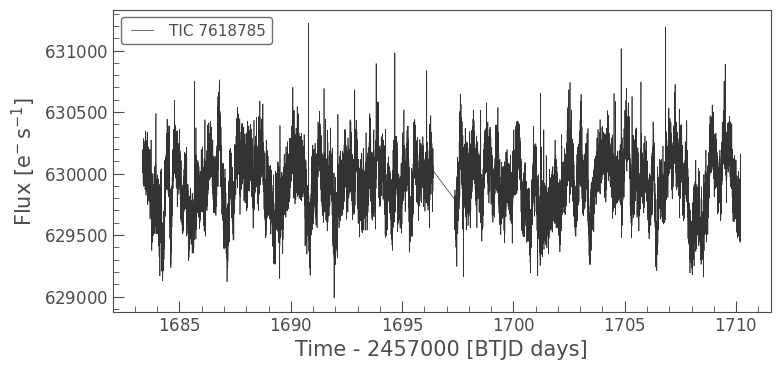

In [36]:
# Using a For Loop to iterate through the tic ids and visualize the data after removing the NaN fluxes  
for target in subsample_tics:
  #open data
  paths = locate_files(target,raw_data_path)
  original_data = open_rawdata(paths,sector=14)

  #saveguard against missing files
  if len(original_data)==0: #if no files exist go to next target in for loop
    pass
  else: #if files exist proceed

    #format data (class object type)
    new_data = original_data[0].PDCSAP_FLUX #index into orignal_data b/c its a list
    #verify class object change
    print('class object change:',type(original_data[0]),'changed to',type(new_data))

    #apply method
    cleaned_data = new_data.remove_nans() 
    #verify cleaned data looks different (or save it)
    print((cleaned_data.plot()), len(cleaned_data.flux)) # Prints out the graphs and prints out the total length of the array after removing the NaN flux

In [42]:
# Saving newly cleaned data

for target in subsample_tics:
  #open data
  paths = locate_files(target,raw_data_path)
  original_data = open_rawdata(paths,sector=14)

  #saveguard against missing files
  if len(original_data)==0: #if no files exist go to next target in for loop
    pass
  else: #if files exist proceed

    #format data (class object type)
    new_data = original_data[0].PDCSAP_FLUX #index into orignal_data b/c its a list
    #verify class object change
    print('class object change:',type(original_data[0]),'changed to',type(new_data))

    #apply method
    cleaned_data = new_data.remove_nans() 
    TIC = 'TIC ' + str(target) 
    lcf = search_lightcurve(TIC, mission="TESS", sector = 14).download()

    print() 

class object change: <class 'lightkurve.lightcurvefile.TessLightCurveFile'> changed to <class 'lightkurve.lightcurve.TessLightCurve'>
[16627.549 16620.307 16624.457 ... 16657.322 16679.496 16668.094]
class object change: <class 'lightkurve.lightcurvefile.TessLightCurveFile'> changed to <class 'lightkurve.lightcurve.TessLightCurve'>
[737407.56 737201.4  737613.56 ... 723579.3  724070.1  724181.5 ]
class object change: <class 'lightkurve.lightcurvefile.TessLightCurveFile'> changed to <class 'lightkurve.lightcurve.TessLightCurve'>
[630005.75 630127.56 630197.   ... 629682.06 629798.25 629720.2 ]
